In [0]:
pip install tensorflow-gpu

In [47]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0


In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



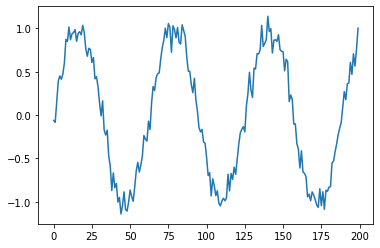

In [56]:
series = np.sin(0.1*np.arange(200)) +np.random.randn(200)*0.1
plt.plot(series)

In [57]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [0]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=100,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

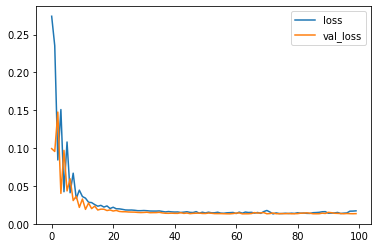

In [59]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_prediction = []
i = -N//2
while len(validation_prediction)<len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i+=1
  validation_prediction.append(p)

In [62]:
len(validation_prediction)

95

In [45]:
validation_target

array([0.60909858, 0.63203953, 0.65749025, 0.6478031 , 0.79278516])

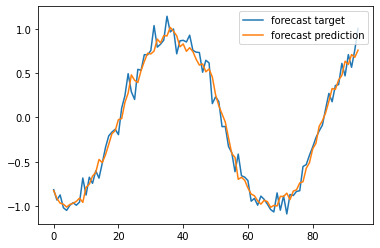

In [63]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction)<len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

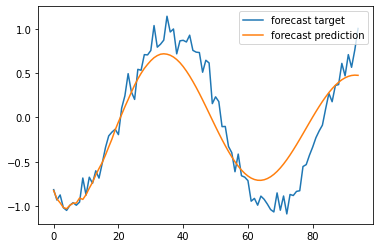

In [65]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()